In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Train_Data_Cleaned.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,0,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,0,7662,5,1,2019,13,15,5,50,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,0,13882,6,9,2019,4,25,9,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,0,6218,5,12,2019,23,30,18,5,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,0,13302,3,1,2019,21,35,16,50,4,45


In [3]:
df.shape

(10682, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Date_of_Journey   10682 non-null  object
 2   Source            10682 non-null  object
 3   Destination       10682 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10682 non-null  object
 6   Arrival_Time      10682 non-null  object
 7   Duration          10682 non-null  object
 8   Total_Stops       10682 non-null  int64 
 9   Additional_Info   10682 non-null  int64 
 10  Price             10682 non-null  int64 
 11  Day               10682 non-null  int64 
 12  Month             10682 non-null  int64 
 13  Year              10682 non-null  int64 
 14  Arrival_Time_hr   10682 non-null  int64 
 15  Arrival_Time_min  10682 non-null  int64 
 16  Dep_Time_hr       10682 non-null  int64 
 17  Dep_Time_min

In [5]:
#df['Total_Stops']=df['Total_Stops'].astype('object')

df['Additional_Info']=df['Additional_Info'].astype('object')

In [6]:
df.describe()

,Total_Stops,Price,Day,Month,Year,Arrival_Time_hr,Arrival_Time_min,Dep_Time_hr,Dep_Time_min,Duration_hr,Duration_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,12.682925,5.534731,2019.0,13.349186,24.690601,12.491013,24.409287,10.244898,28.326624
std,0.675229,4611.548810,8.803800,2.987626,0.0,6.859317,16.506808,5.748820,18.767801,8.494916,16.945817
min,0.000000,1759.000000,3.000000,1.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,5.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000,15.000000
50%,1.000000,8372.000000,6.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,12.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

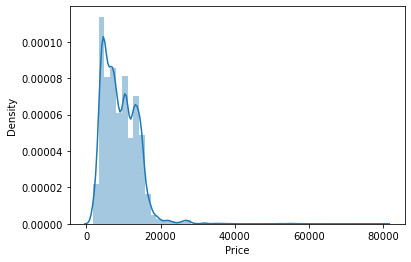

In [7]:
sns.distplot(df['Price'])

In [8]:
df['Price'].skew()

1.812404554693161

In [9]:
df['Total_Duration']=(df['Duration_hr']*60)+df['Duration_min']

<AxesSubplot:xlabel='Total_Duration'>

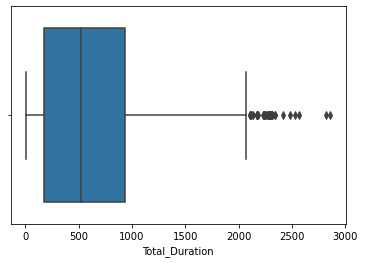

In [10]:
sns.boxplot(df['Total_Duration'])

In [11]:
q75, q25 = np.percentile(df['Total_Duration'], [75 ,25])
iqr = q75 - q25
ll = q25 - (iqr*1.5)
ul = q75 + (iqr*1.5)

df['Total_Duration'] = np.where(
    df['Total_Duration']>ul,
    ul,
    np.where(
        df['Total_Duration']<ll,
        ll,
        df['Total_Duration']
    )
)

In [12]:

q75, q25 = np.percentile(df['Price'], [75 ,25])
iqr = q75 - q25
ll = q25 - (iqr*1.5)
ul = q75 + (iqr*1.5)

df['Price'] = np.where(
    df['Price']>ul,
    ul,
    np.where(
        df['Price']<ll,
        ll,
        df['Price']
    )
)

df['Price'].skew()


0.5924973647486942

In [13]:
#sns.distplot(df['Price'])

<AxesSubplot:xlabel='Total_Duration'>

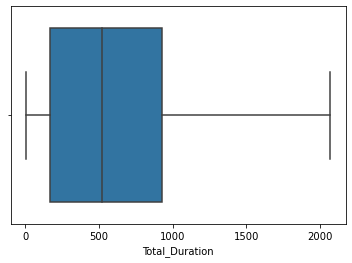

In [14]:
sns.boxplot(df['Total_Duration'])

<AxesSubplot:>

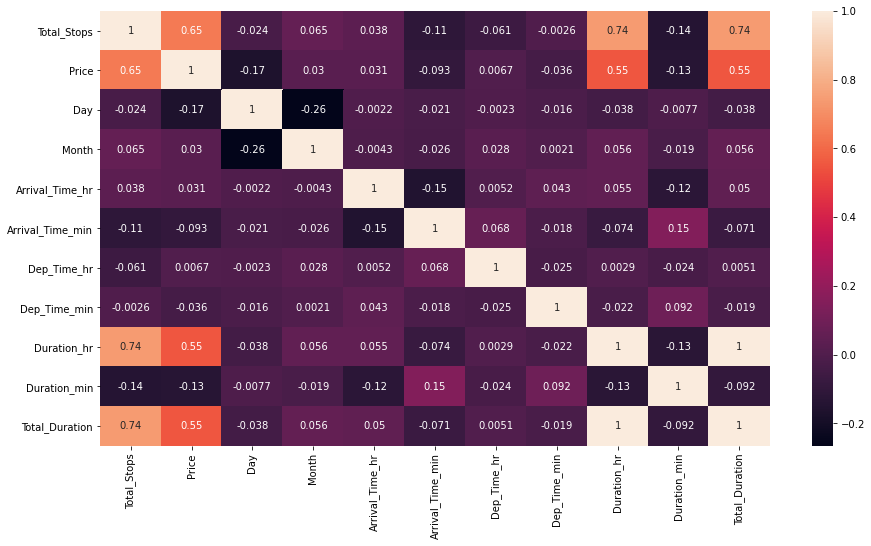

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df.drop('Year',axis=1).corr(),annot=True)

In [16]:
df['Airline']=df['Airline'].str.replace('Multiple carriers Premium economy','Multiple carriers')

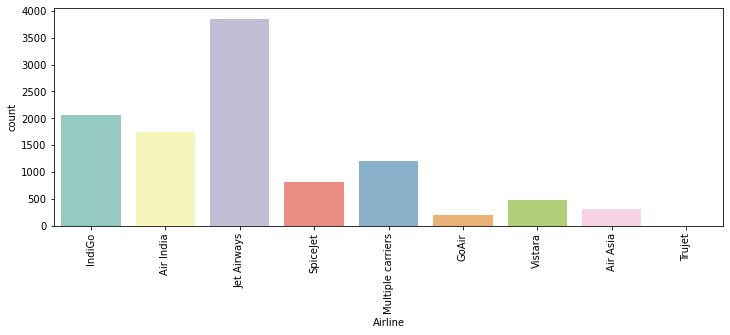

In [17]:
plt.figure(figsize=(12,4)) 
sns.countplot(df['Airline'],palette='Set3')
plt.xticks(rotation=90)
plt.show()

In [18]:
df_grp=df.groupby(by='Airline')['Price'].agg('mean').sort_values(ascending=False)
df_grp.index

Index(['Jet Airways', 'Multiple carriers', 'Air India', 'Vistara', 'GoAir',
       'IndiGo', 'Air Asia', 'SpiceJet', 'Trujet'],
      dtype='object', name='Airline')

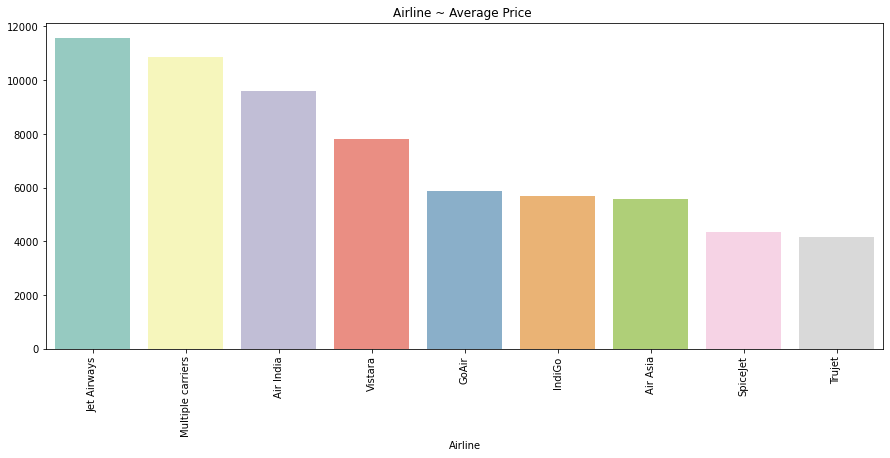

In [19]:
plt.figure(figsize=(15,6)) 
sns.barplot(x=df_grp.index,y=df_grp.values,palette='Set3')
plt.title('Airline ~ Average Price ')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

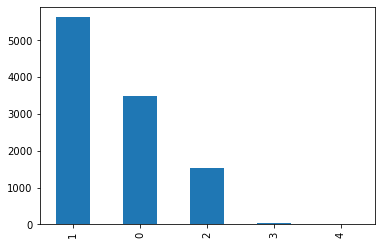

In [20]:
df['Total_Stops'].value_counts().plot.bar()

In [21]:
df.groupby(by='Total_Stops').agg('mean')['Price']

Total_Stops
0     5020.743913
1    10491.504533
2    12647.106579
3    13112.000000
4    17686.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

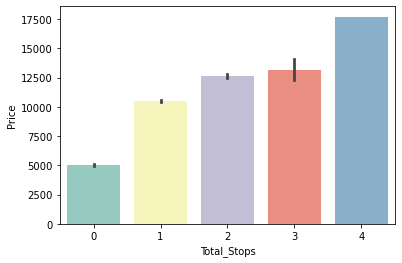

In [22]:
sns.barplot(df['Total_Stops'],df['Price'],palette='Set3')

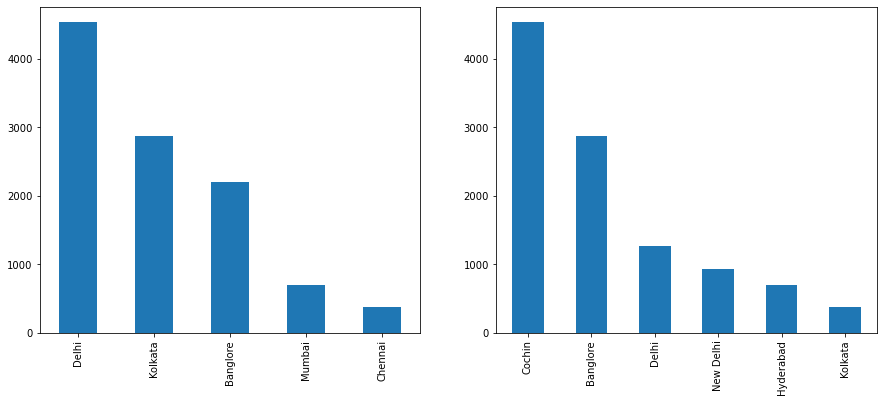

In [23]:
plt.figure(1,figsize=(15,6)) 
plt.subplot(121) 
df['Source'].value_counts().plot.bar()
plt.subplot(122)
df['Destination'].value_counts().plot.bar()
plt.show()

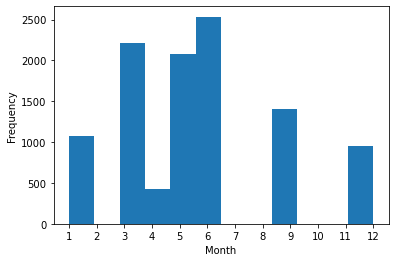

In [24]:
lab=[1,2,3,4,5,6,7,8,9,10,11,12]
plt.hist(df['Month'],bins=12)
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

<AxesSubplot:xlabel='Total_Duration', ylabel='Price'>

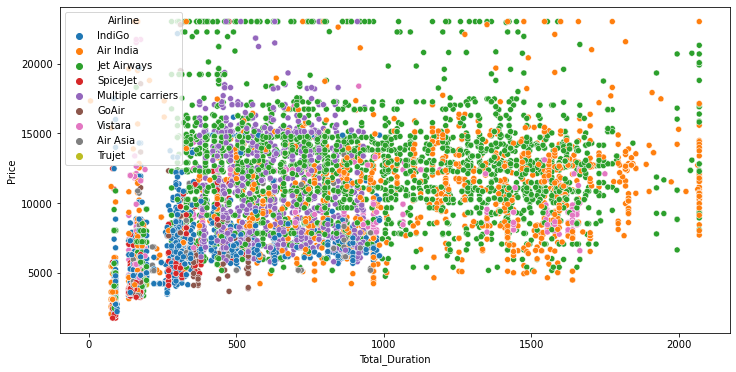

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Total_Duration'],df['Price'],hue=df['Airline'])

<AxesSubplot:xlabel='Duration_hr', ylabel='Price'>

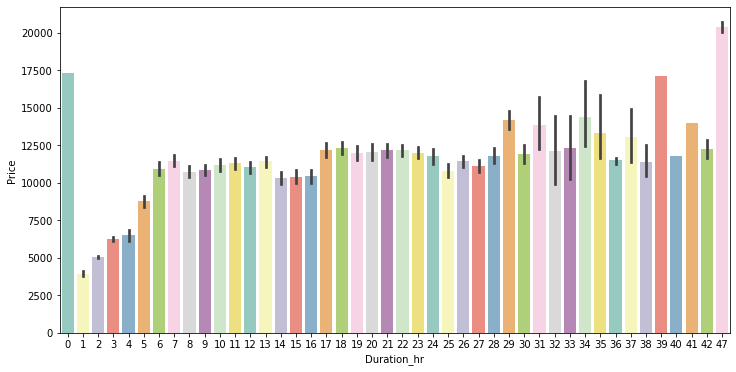

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(df['Duration_hr'],df['Price'],palette='Set3')

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

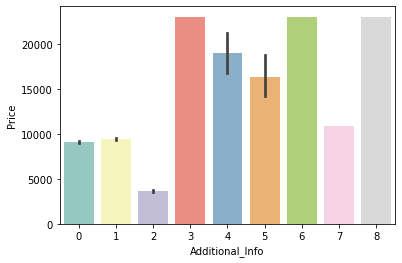

In [27]:
sns.barplot(df['Additional_Info'],df['Price'],palette='Set3')


<AxesSubplot:xlabel='Day', ylabel='Price'>

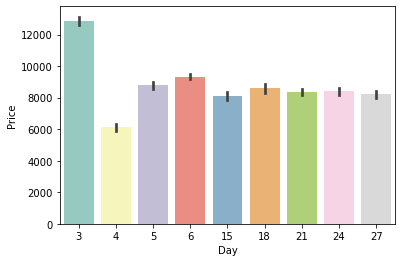

In [28]:
sns.barplot(df['Day'],df['Price'],palette='Set3')


<AxesSubplot:xlabel='Month', ylabel='Price'>

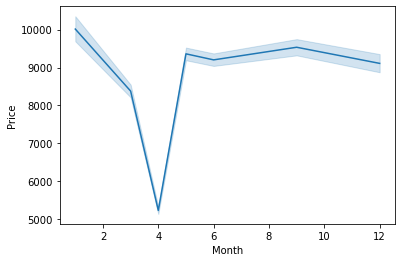

In [29]:
sns.lineplot(df['Month'],df['Price'])


<AxesSubplot:xlabel='Dep_Time_hr', ylabel='Price'>

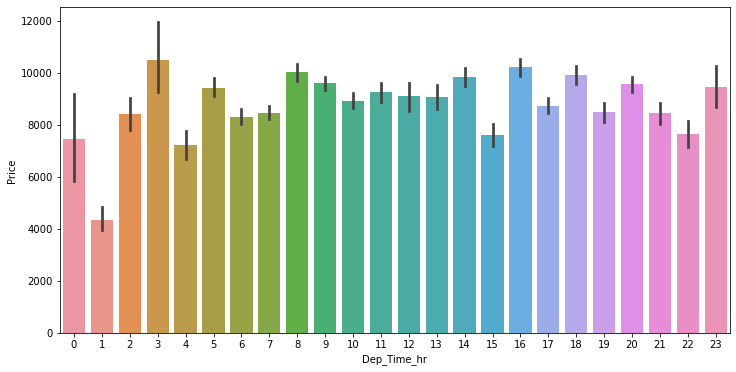

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(df['Dep_Time_hr'],df['Price'])

<AxesSubplot:xlabel='Arrival_Time_hr', ylabel='Price'>

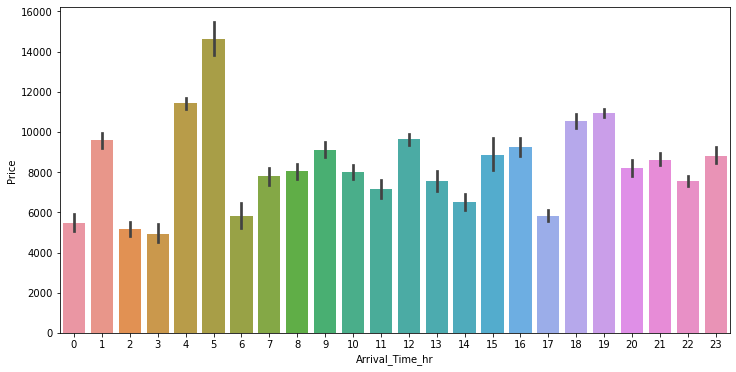

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(df['Arrival_Time_hr'],df['Price'])

In [32]:
df.to_csv('Train_Data_Final.csv', index=None)